In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/25-1 ·Ñá·ÖÆ·ÑÉ·Ö©·Üº·Ñâ·Ö°·Ü´ ·Ñí·Ö•·Ñã·Ö±·ÑÜ·Ö¢·ÑÜ·ÖÆ·ÜØ ·Ñá·ÖÆ·Ü´·ÑÖ·Ö≤ ·Ñí·Ö¢·Ñè·Ö•·Ñê·Ö©·Ü´/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/25-1 ·Ñá·ÖÆ·ÑÉ·Ö©·Üº·Ñâ·Ö°·Ü´ ·Ñí·Ö•·Ñã·Ö±·ÑÜ·Ö¢·ÑÜ·ÖÆ·ÜØ ·Ñá·ÖÆ·Ü´·ÑÖ·Ö≤ ·Ñí·Ö¢·Ñè·Ö•·Ñê·Ö©·Ü´/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/test.csv')

## 1. Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   Îß§Î¨ºÌôïÏù∏Î∞©Ïãù  2452 non-null   object 
 2   Î≥¥Ï¶ùÍ∏à     2452 non-null   float64
 3   ÏõîÏÑ∏      2452 non-null   int64  
 4   Ï†ÑÏö©Î©¥Ï†Å    1665 non-null   float64
 5   Ìï¥ÎãπÏ∏µ     2223 non-null   float64
 6   Ï¥ùÏ∏µ      2436 non-null   float64
 7   Î∞©Ìñ•      2452 non-null   object 
 8   Î∞©Ïàò      2436 non-null   float64
 9   ÏöïÏã§Ïàò     2434 non-null   float64
 10  Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä  2452 non-null   object 
 11  Ï¥ùÏ£ºÏ∞®ÎåÄÏàò   1756 non-null   float64
 12  Í¥ÄÎ¶¨ÎπÑ     2452 non-null   int64  
 13  Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå   2452 non-null   object 
 14  Ï†úÍ≥µÌîåÎû´Ìèº   2452 non-null   object 
 15  Í≤åÏû¨Ïùº     2452 non-null   object 
 16  ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


In [ ]:
train.isnull().sum()

ID          0
Îß§Î¨ºÌôïÏù∏Î∞©Ïãù      0
Î≥¥Ï¶ùÍ∏à         0
ÏõîÏÑ∏          0
Ï†ÑÏö©Î©¥Ï†Å      787
Ìï¥ÎãπÏ∏µ       229
Ï¥ùÏ∏µ         16
Î∞©Ìñ•          0
Î∞©Ïàò         16
ÏöïÏã§Ïàò        18
Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä      0
Ï¥ùÏ£ºÏ∞®ÎåÄÏàò     696
Í¥ÄÎ¶¨ÎπÑ         0
Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå       0
Ï†úÍ≥µÌîåÎû´Ìèº       0
Í≤åÏû¨Ïùº         0
ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä      0
dtype: int64

In [ ]:
plt.figure(figsize = (15, 10))
for ind, val in enumerate(['Îß§Î¨ºÌôïÏù∏Î∞©Ïãù', 'Î∞©Ìñ•', 'Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä', 'Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå', 'Ï†úÍ≥µÌîåÎû´Ìèº', 'Í≤åÏû¨Ïùº']):
    plt.subplot(2,3, ind + 1)
    sns.countplot(data = train, x = val, hue = 'ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä', palette = 'Set2')
    plt.legend(fontsize=10)
    plt.title(f'{val} vs ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä')

plt.tight_layout()
plt.show()

In [ ]:
train['ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä'].value_counts()

ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä
0    2154
1     298
Name: count, dtype: int64

<ipython-input-18-6ff26c71f73f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = 'Îß§Î¨ºÌôïÏù∏Î∞©Ïãù', palette = 'Set2')


Text(0.5, 1.0, 'Îß§Î¨ºÌôïÏù∏Î∞©Ïãù')

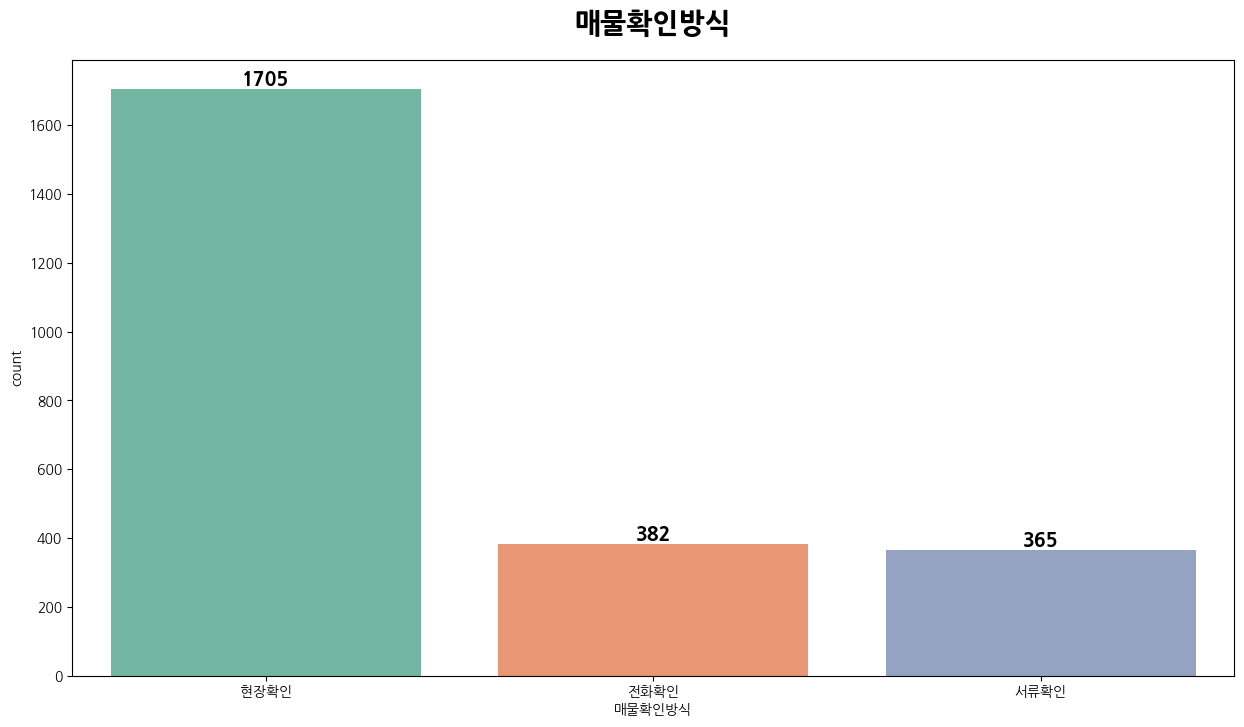

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = 'Îß§Î¨ºÌôïÏù∏Î∞©Ïãù', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("Îß§Î¨ºÌôïÏù∏Î∞©Ïãù",fontweight="black",size=20,pad=20)

In [ ]:
count_per_category = train.groupby('Îß§Î¨ºÌôïÏù∏Î∞©Ïãù')['ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä'].value_counts().unstack(fill_value=0)

# ÎπÑÏú® Í≥ÑÏÇ∞
ratio_per_category = count_per_category.div(count_per_category.sum(axis=1), axis=0)

# Í≤∞Í≥º Ï∂úÎ†•
print("Í∞úÏàò:")
print(count_per_category)

print("\nÎπÑÏú®:")
print(ratio_per_category)

Í∞úÏàò:
ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä     0    1
Îß§Î¨ºÌôïÏù∏Î∞©Ïãù           
ÏÑúÎ•òÌôïÏù∏     327   38
Ï†ÑÌôîÌôïÏù∏     346   36
ÌòÑÏû•ÌôïÏù∏    1481  224

ÎπÑÏú®:
ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä         0         1
Îß§Î¨ºÌôïÏù∏Î∞©Ïãù                    
ÏÑúÎ•òÌôïÏù∏    0.895890  0.104110
Ï†ÑÌôîÌôïÏù∏    0.905759  0.094241
ÌòÑÏû•ÌôïÏù∏    0.868622  0.131378


In [ ]:
train['Î≥¥Ï¶ùÍ∏à'].describe()

count    2.452000e+03
mean     1.574188e+08
std      1.212794e+08
min      5.000000e+06
25%      7.500000e+07
50%      1.325000e+08
75%      1.890000e+08
max      4.090000e+08
Name: Î≥¥Ï¶ùÍ∏à, dtype: float64

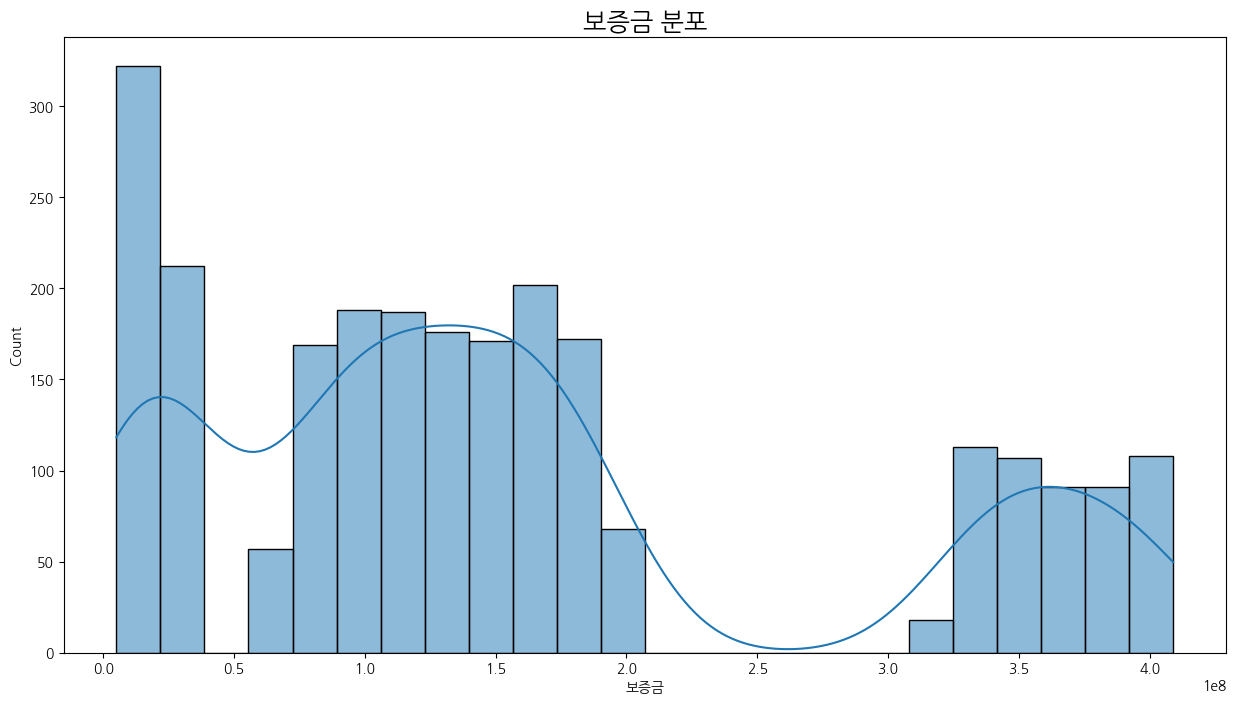

In [ ]:
plt.figure(figsize = (15, 8))
sns.histplot(data = train, x = 'Î≥¥Ï¶ùÍ∏à', kde = True)
plt.title('Î≥¥Ï¶ùÍ∏à Î∂ÑÌè¨', size = 18)
plt.show()

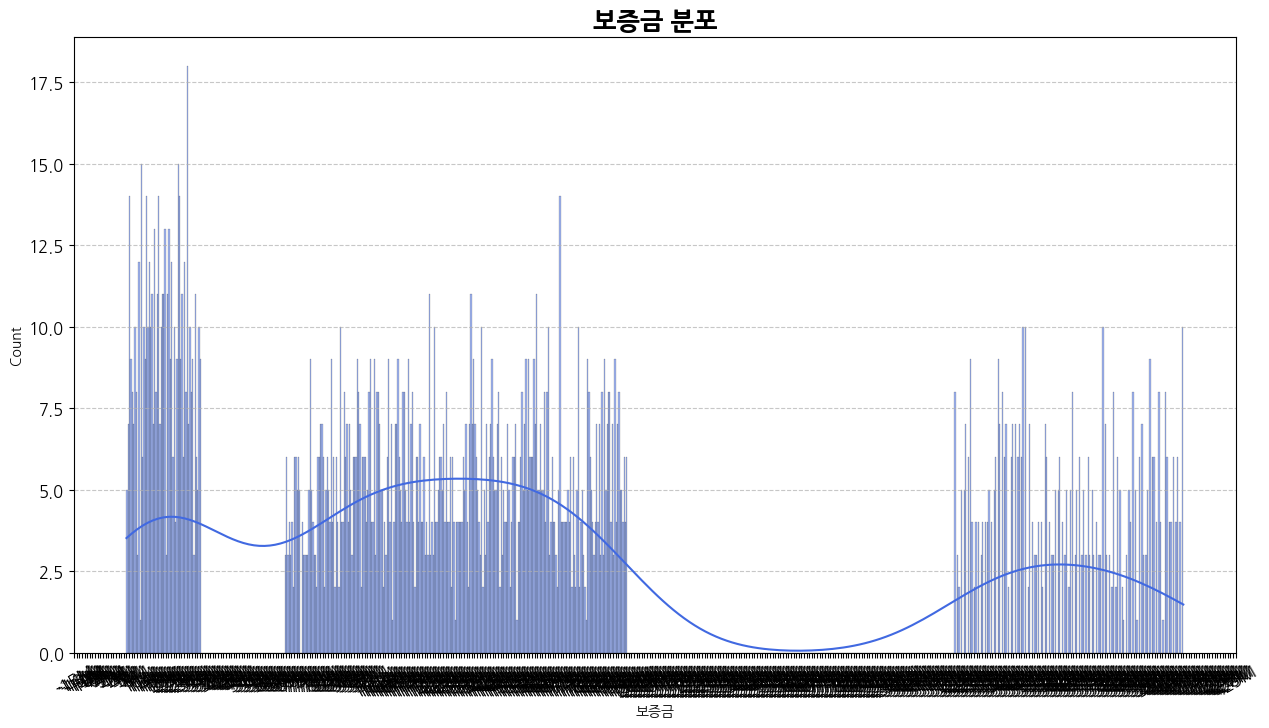

In [ ]:
import matplotlib.ticker as mticker
plt.figure(figsize=(15, 8))

sns.histplot(data=train, x='Î≥¥Ï¶ùÍ∏à', kde=True, binwidth=500000, color="royalblue", edgecolor='black')
plt.title('Î≥¥Ï¶ùÍ∏à Î∂ÑÌè¨', size=18, fontweight='bold')

# xÏ∂ï ÎààÍ∏à Ï°∞Ï†ï: 100Îßå Ïõê Îã®ÏúÑÎ°ú ÌëúÏãú
ax = plt.gca()
ax.xaxis.set_major_locator(mticker.MultipleLocator(1000000))  # 100Îßå Ïõê Îã®ÏúÑÎ°ú ÎààÍ∏à ÏÑ§Ï†ï
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000000)}M'))  # '1M', '2M' ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò

# xÏ∂ï ÎùºÎ≤® ÌöåÏ†Ñ Ï°∞Ï†ï (Îçî Ïûò Î≥¥Ïù¥Í≤å)
plt.xticks(rotation=30, fontsize=12)

# yÏ∂ï ÎùºÎ≤®ÎèÑ Î≥¥Í∏∞ ÏâΩÍ≤å Ï°∞Ï†ï
plt.yticks(fontsize=12)

# ÌÖåÎëêÎ¶¨ Ïä§ÌÉÄÏùº Ï†ïÎ¶¨
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Í∞ÄÎèÖÏÑ±ÏùÑ ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ yÏ∂ï Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä

plt.show()


In [ ]:
train['ÏõîÏÑ∏'].describe()

count      2452.000000
mean     380420.065253
std      206425.413601
min           0.000000
25%      200000.000000
50%      380000.000000
75%      550000.000000
max      750000.000000
Name: ÏõîÏÑ∏, dtype: float64

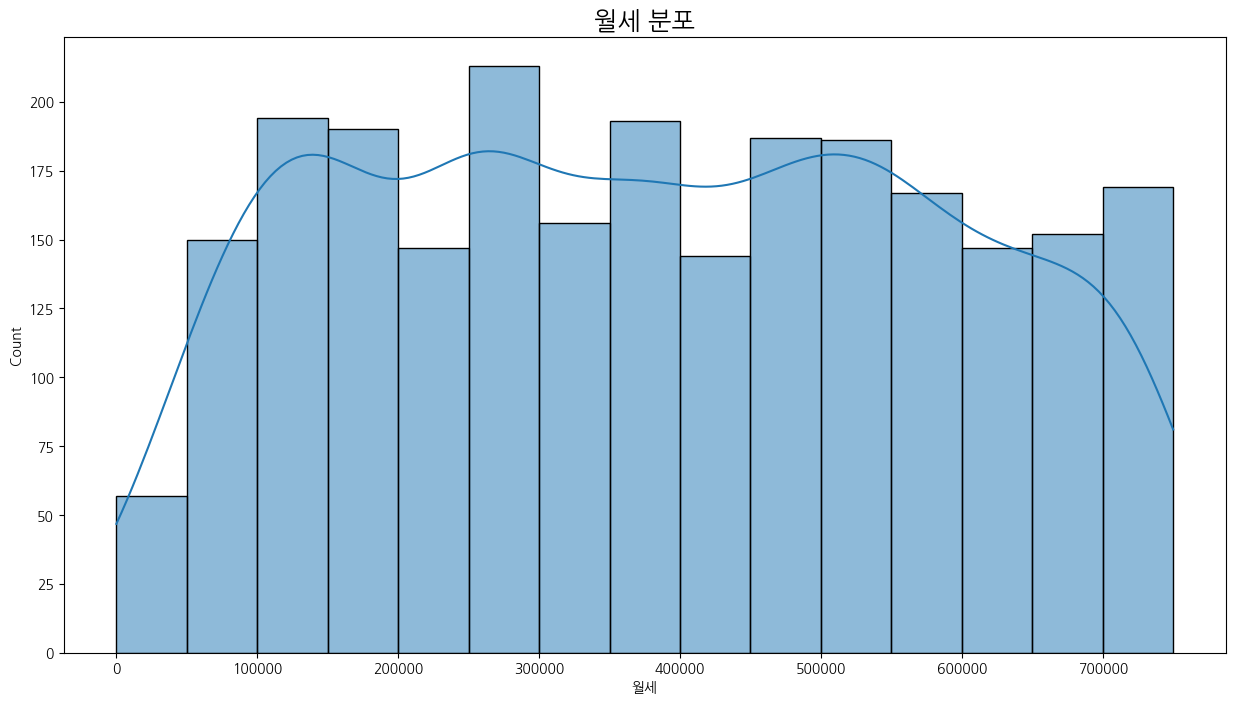

In [ ]:
plt.figure(figsize = (15, 8))
sns.histplot(data = train, x = 'ÏõîÏÑ∏', kde = True)
plt.title('ÏõîÏÑ∏ Î∂ÑÌè¨', size = 18)
plt.show()

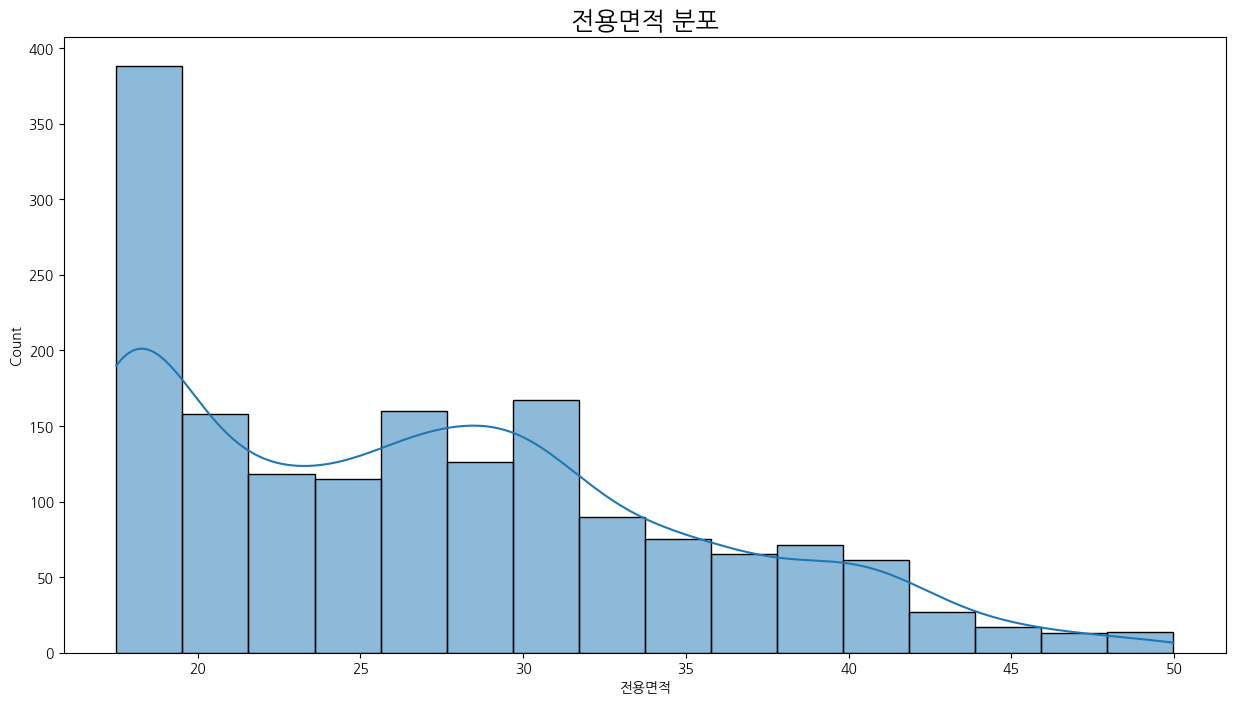

In [ ]:
plt.figure(figsize = (15, 8))
sns.histplot(data = train, x = 'Ï†ÑÏö©Î©¥Ï†Å', kde = True)
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨', size = 18)
plt.show()

In [ ]:
train['Ï†ÑÏö©Î©¥Ï†Å'].describe()

count    1665.000000
mean       27.009628
std         7.951757
min        17.500000
25%        19.800000
50%        26.400000
75%        32.110000
max        49.970000
Name: Ï†ÑÏö©Î©¥Ï†Å, dtype: float64

<ipython-input-30-12dcd811fce6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = 'Ìï¥ÎãπÏ∏µ', palette = 'Set2')


Text(0.5, 1.0, 'Ìï¥ÎãπÏ∏µ')

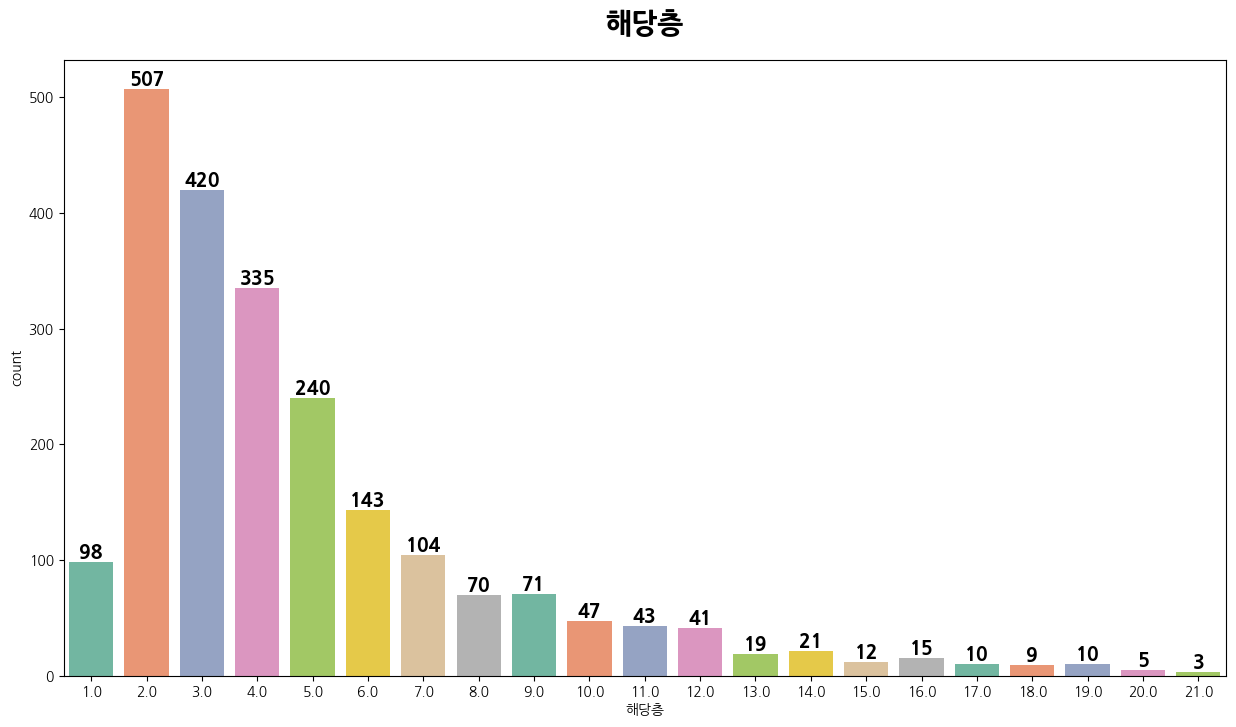

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = 'Ìï¥ÎãπÏ∏µ', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("Ìï¥ÎãπÏ∏µ",fontweight="black",size=20,pad=20)

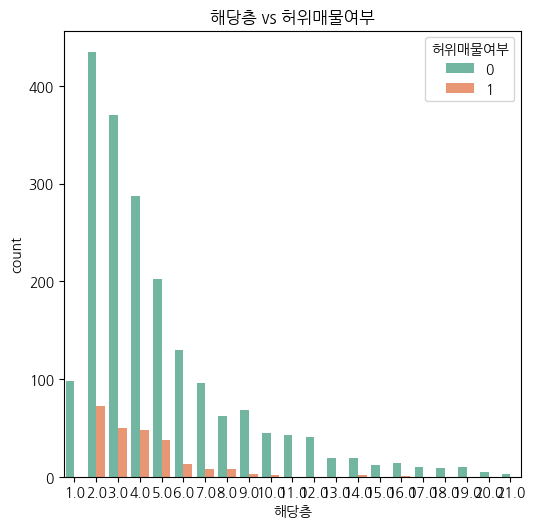

In [ ]:
plt.figure(figsize=(15, 10))
for ind, val in enumerate(['Ìï¥ÎãπÏ∏µ']):
    plt.subplot(2, 3, ind + 1)
    sns.countplot(data=train, x=val, hue='ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä', palette='Set2')
    plt.title(f'{val} vs ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä')

plt.tight_layout()
plt.show()


<ipython-input-42-298b07365f17>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = 'Ï¥ùÏ∏µ', palette = 'Set2')


Text(0.5, 1.0, 'Ï¥ùÏ∏µ')

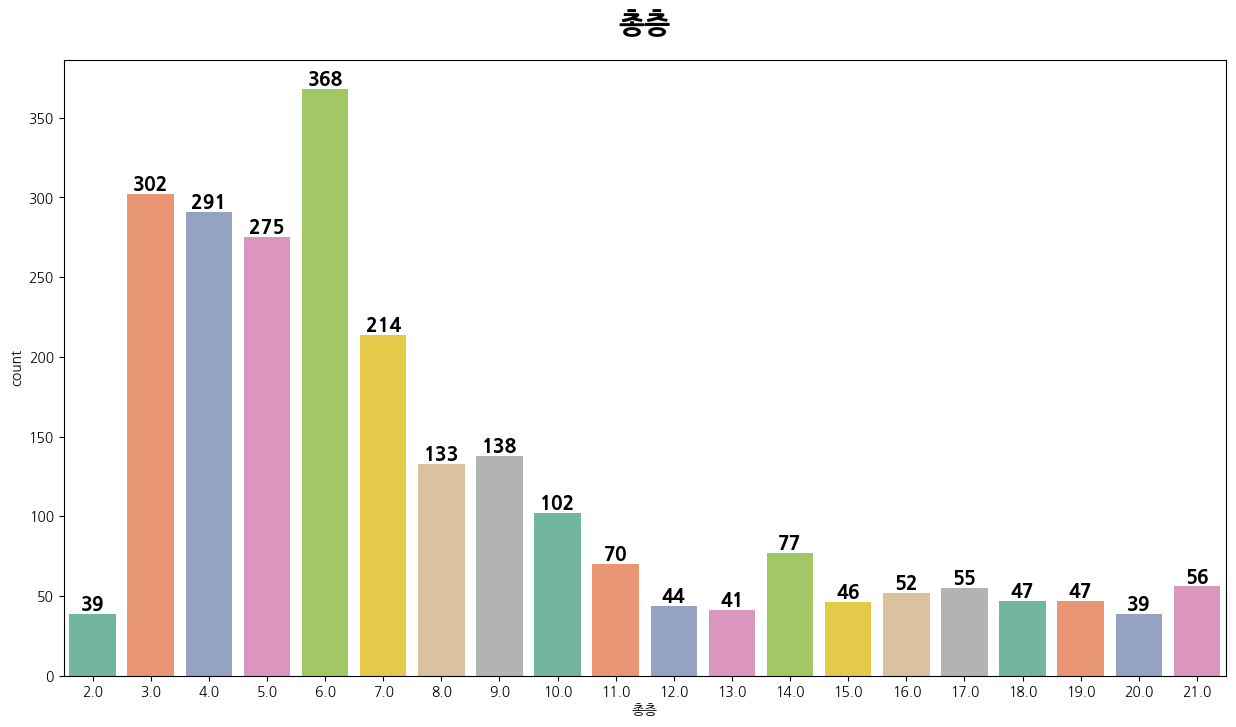

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = 'Ï¥ùÏ∏µ', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("Ï¥ùÏ∏µ",fontweight="black",size=20,pad=20)

<ipython-input-43-30d0d0690beb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = 'Î∞©Ìñ•', palette = 'Set2')


Text(0.5, 1.0, 'Î∞©Ìñ•')

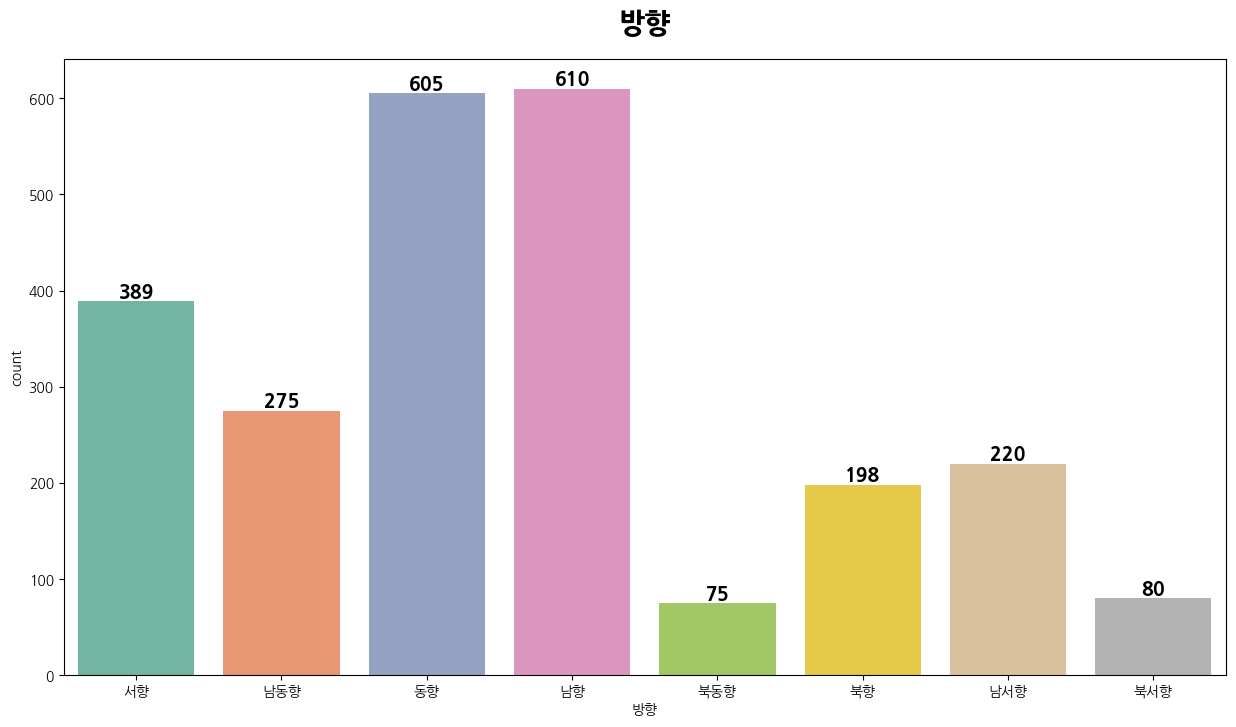

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = 'Î∞©Ìñ•', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("Î∞©Ìñ•",fontweight="black",size=20,pad=20)

In [ ]:
count_per_category = train.groupby('Î∞©Ìñ•')['ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä'].value_counts().unstack(fill_value=0)

# ÎπÑÏú® Í≥ÑÏÇ∞
ratio_per_category = count_per_category.div(count_per_category.sum(axis=1), axis=0)

# Í≤∞Í≥º Ï∂úÎ†•
print("Í∞úÏàò:")
print(count_per_category)

print("\nÎπÑÏú®:")
print(ratio_per_category)

Í∞úÏàò:
ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä    0   1
Î∞©Ìñ•             
ÎÇ®ÎèôÌñ•     248  27
ÎÇ®ÏÑúÌñ•     196  24
ÎÇ®Ìñ•      570  40
ÎèôÌñ•      552  53
Î∂ÅÎèôÌñ•      71   4
Î∂ÅÏÑúÌñ•      72   8
Î∂ÅÌñ•      135  63
ÏÑúÌñ•      310  79

ÎπÑÏú®:
ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä         0         1
Î∞©Ìñ•                        
ÎÇ®ÎèôÌñ•     0.901818  0.098182
ÎÇ®ÏÑúÌñ•     0.890909  0.109091
ÎÇ®Ìñ•      0.934426  0.065574
ÎèôÌñ•      0.912397  0.087603
Î∂ÅÎèôÌñ•     0.946667  0.053333
Î∂ÅÏÑúÌñ•     0.900000  0.100000
Î∂ÅÌñ•      0.681818  0.318182
ÏÑúÌñ•      0.796915  0.203085


<ipython-input-45-ebc2a00f6812>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = 'Î∞©Ïàò', palette = 'Set2')


Text(0.5, 1.0, 'Î∞©Ïàò')

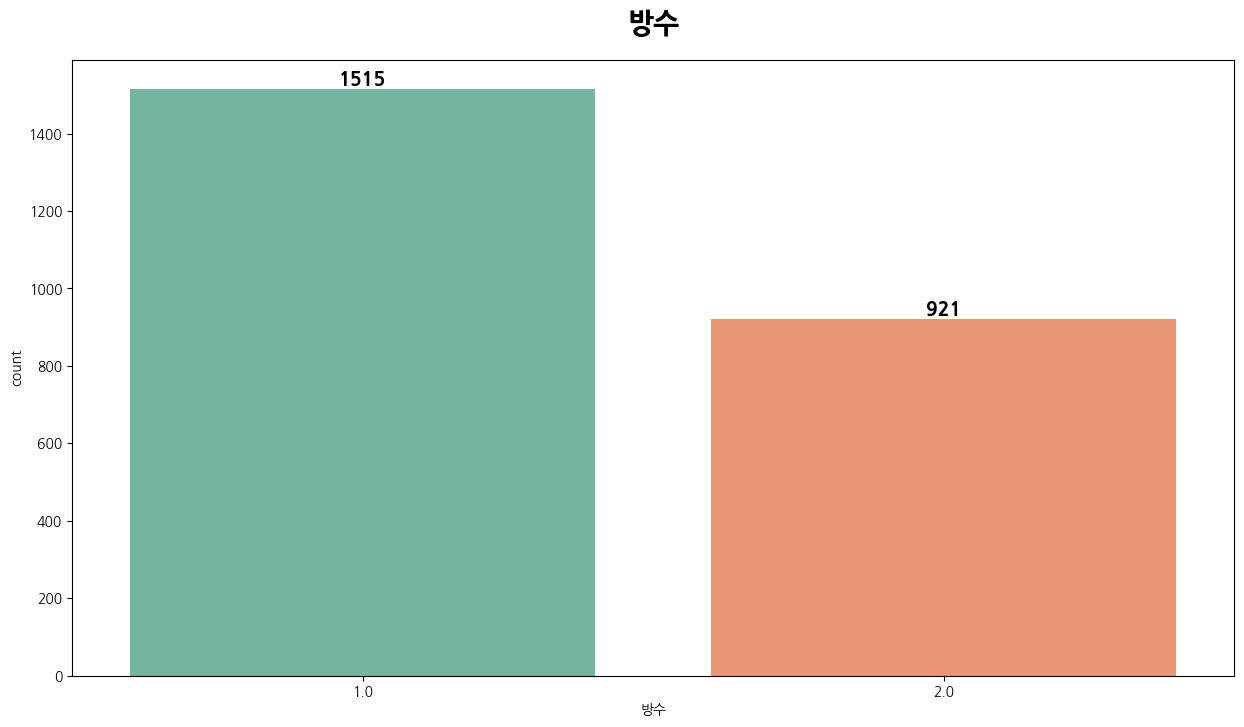

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = 'Î∞©Ïàò', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("Î∞©Ïàò",fontweight="black",size=20,pad=20)

<ipython-input-46-141c47ca1692>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='Î∞©Ïàò', y='Ï†ÑÏö©Î©¥Ï†Å', palette="Set2")


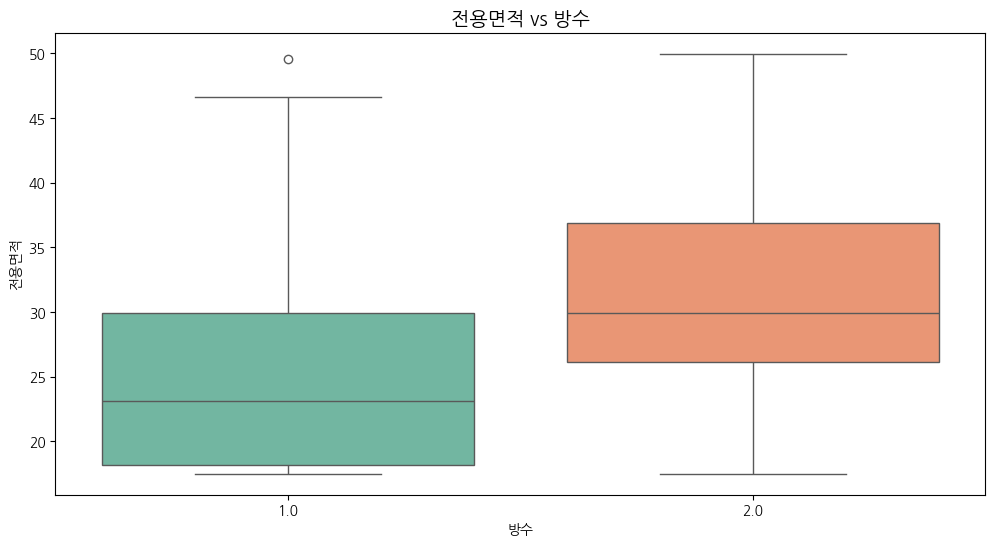

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='Î∞©Ïàò', y='Ï†ÑÏö©Î©¥Ï†Å', palette="Set2")
plt.title("Ï†ÑÏö©Î©¥Ï†Å vs Î∞©Ïàò", fontsize=14)
plt.show()

<ipython-input-52-6af36ebf76a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = 'ÏöïÏã§Ïàò', palette = 'Set2')


Text(0.5, 1.0, 'ÏöïÏã§Ïàò')

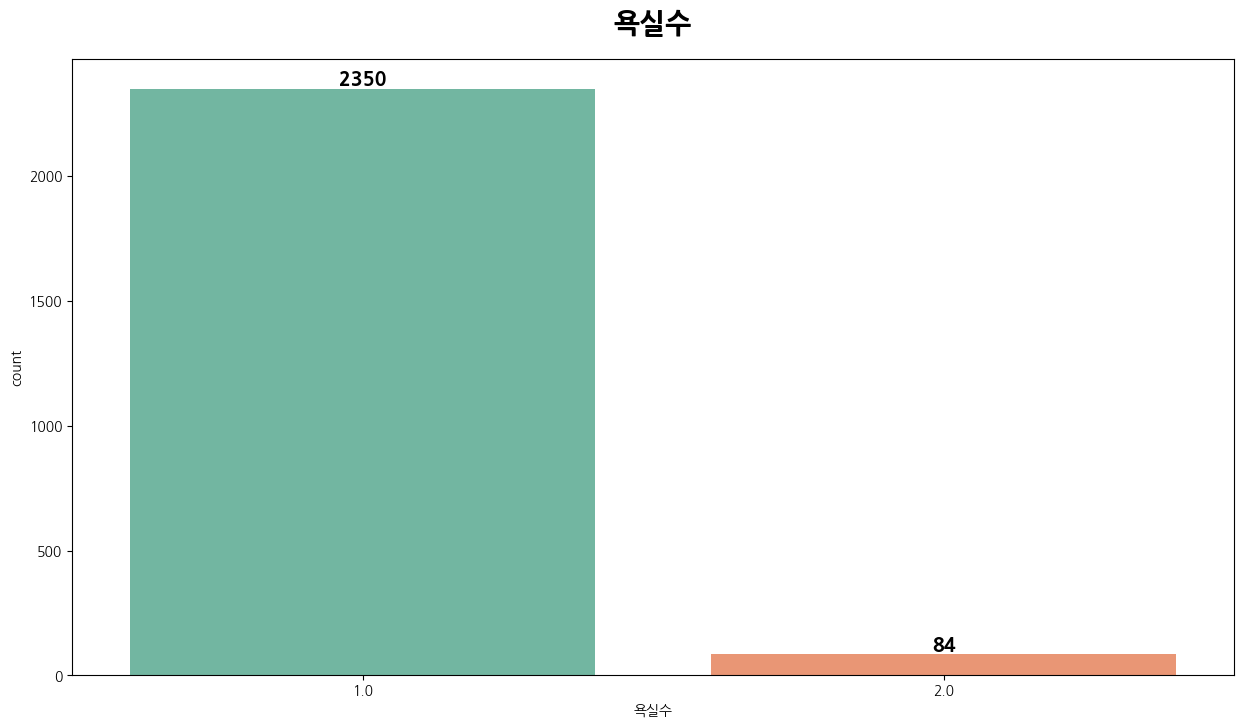

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = 'ÏöïÏã§Ïàò', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("ÏöïÏã§Ïàò",fontweight="black",size=20,pad=20)

In [ ]:
bathroom_2 = train[train['ÏöïÏã§Ïàò'] == 2]
print(bathroom_2['Î∞©Ïàò'].value_counts())

Î∞©Ïàò
2.0    84
Name: count, dtype: int64


<ipython-input-55-a79757a1abec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bathroom_2, x='Î∞©Ïàò', y='Ï†ÑÏö©Î©¥Ï†Å', palette="Set2")


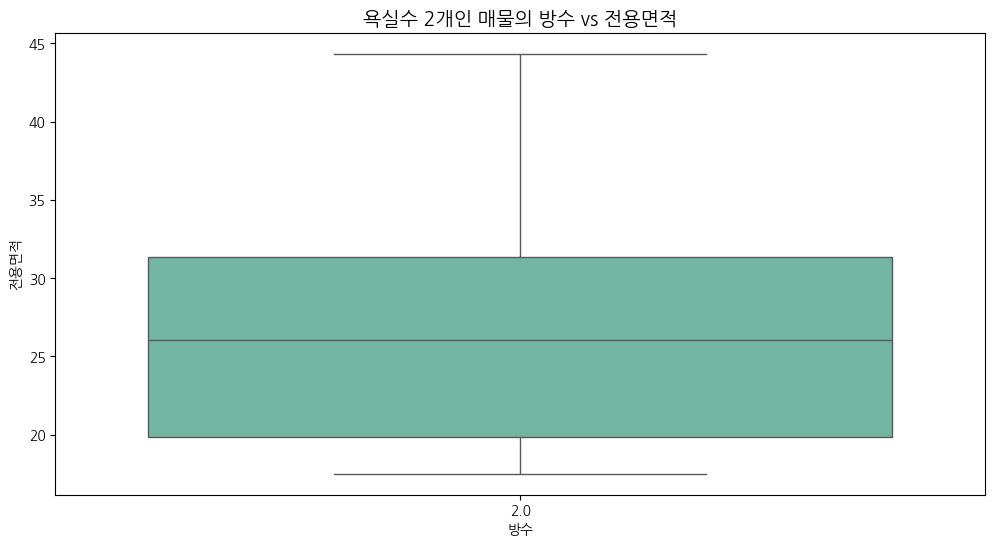

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=bathroom_2, x='Î∞©Ïàò', y='Ï†ÑÏö©Î©¥Ï†Å', palette="Set2")
plt.title("ÏöïÏã§Ïàò 2Í∞úÏù∏ Îß§Î¨ºÏùò Î∞©Ïàò vs Ï†ÑÏö©Î©¥Ï†Å", fontsize=14)
plt.show()


<ipython-input-57-f021c616764d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = 'Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä', palette = 'Set2')


Text(0.5, 1.0, 'Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä')

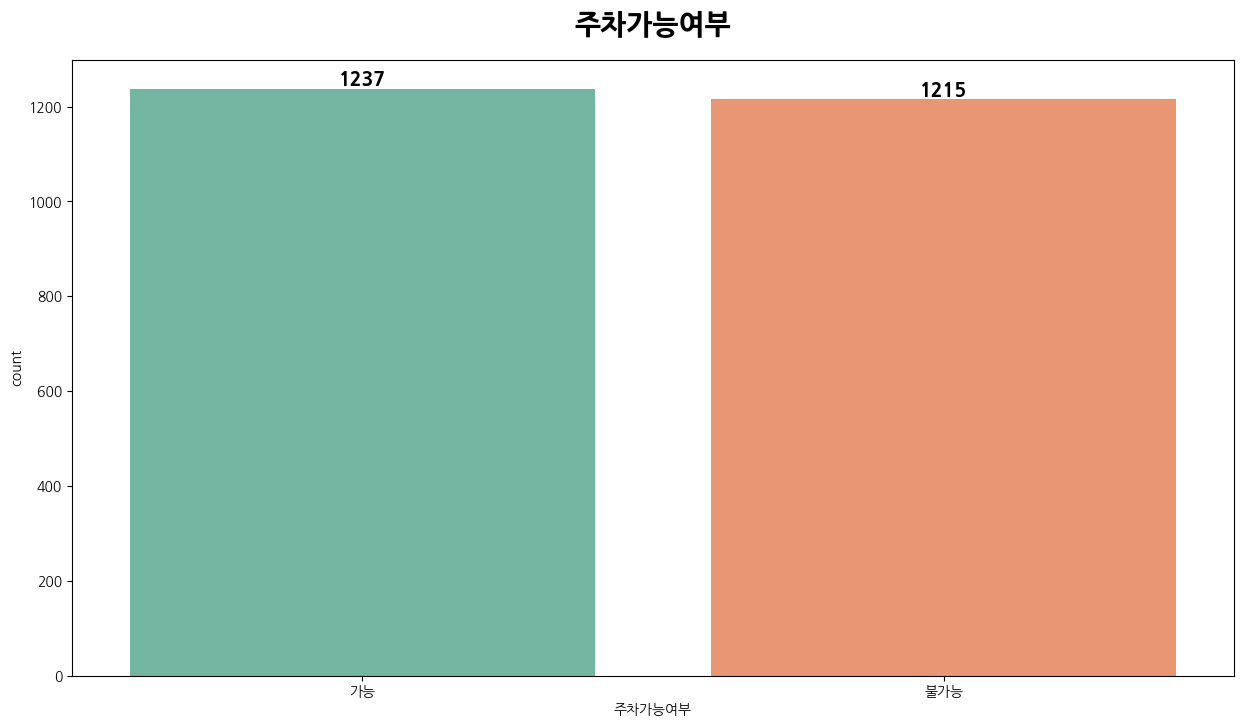

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = 'Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä",fontweight="black",size=20,pad=20)

In [ ]:
plt.figure(figsize=(15, 10))
for ind, val in enumerate(['Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä']):
    plt.subplot(2, 3, ind + 1)
    sns.countplot(data=train, x=val, hue='ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä', palette='Set2')
    plt.title(f'{val} vs ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä')

plt.tight_layout()
plt.show()

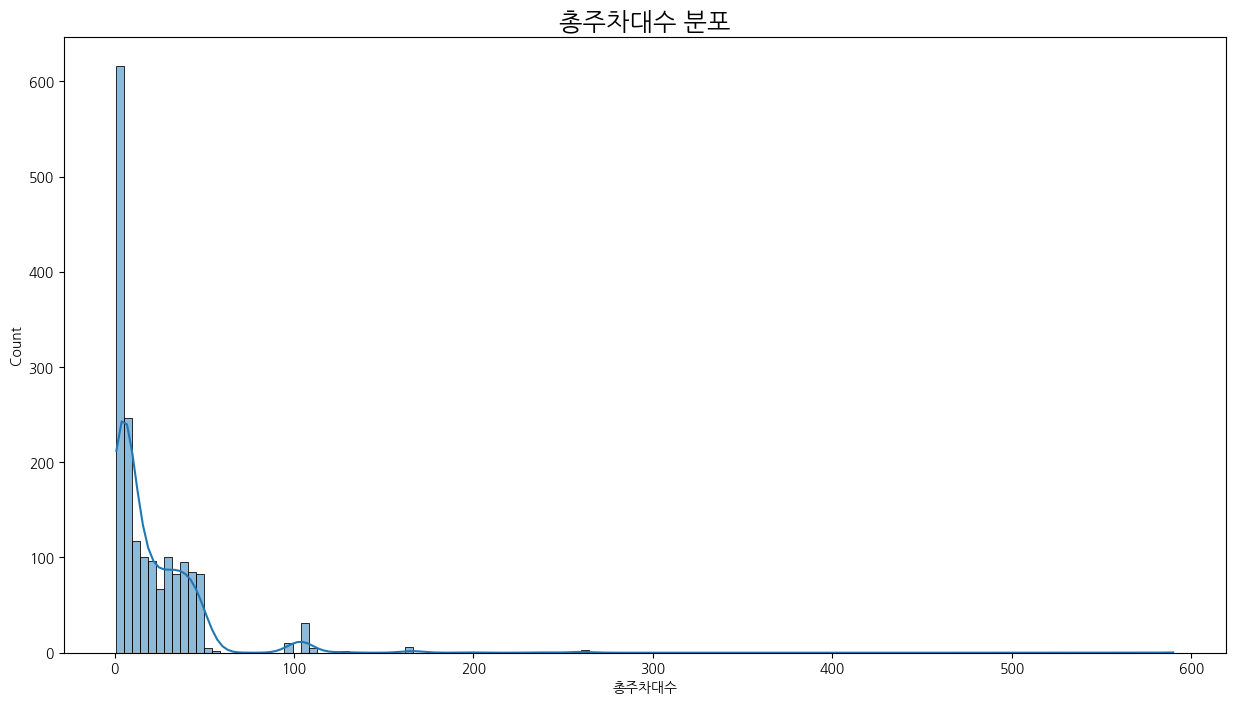

In [ ]:
plt.figure(figsize = (15, 8))
sns.histplot(data = train, x = 'Ï¥ùÏ£ºÏ∞®ÎåÄÏàò', kde = True)
plt.title('Ï¥ùÏ£ºÏ∞®ÎåÄÏàò Î∂ÑÌè¨', size = 18)
plt.show()

In [ ]:
train['Ï¥ùÏ£ºÏ∞®ÎåÄÏàò'].describe()

count    1756.000000
mean       20.332574
std        28.939900
min         1.000000
25%         4.000000
50%        10.000000
75%        31.000000
max       590.000000
Name: Ï¥ùÏ£ºÏ∞®ÎåÄÏàò, dtype: float64

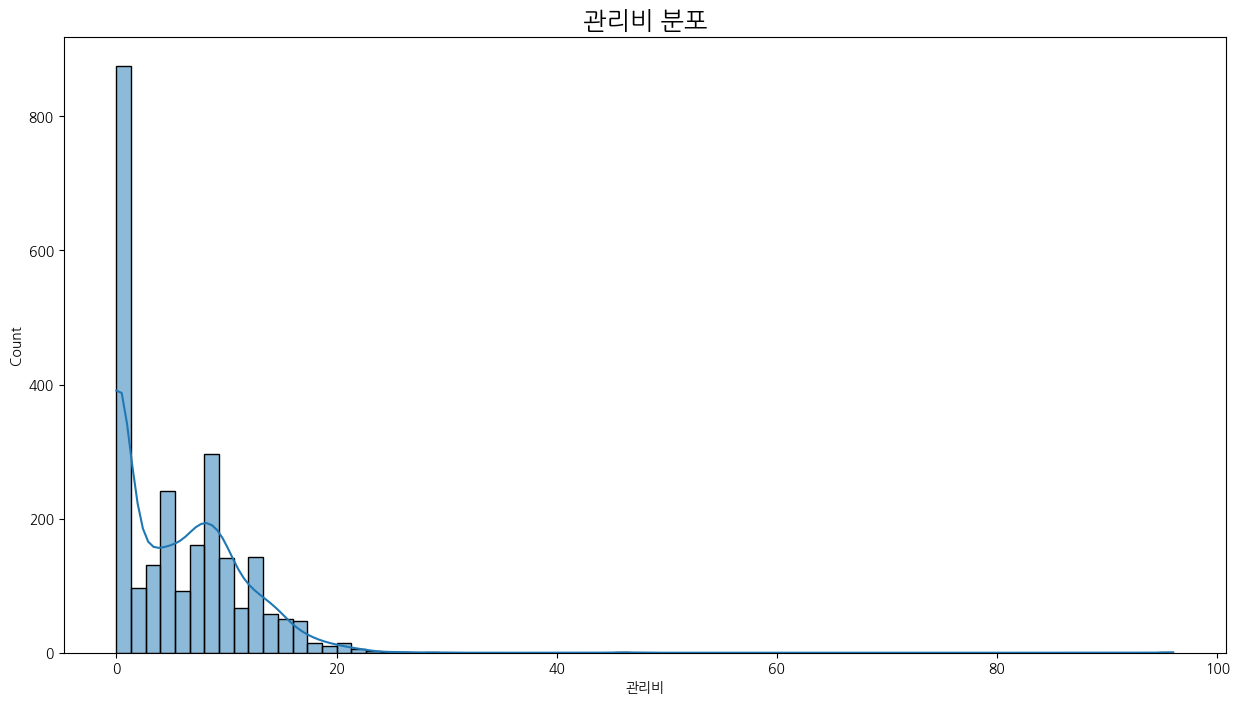

In [ ]:
plt.figure(figsize = (15, 8))
sns.histplot(data = train, x = 'Í¥ÄÎ¶¨ÎπÑ', kde = True)
plt.title('Í¥ÄÎ¶¨ÎπÑ Î∂ÑÌè¨', size = 18)
plt.show()

In [ ]:
train['Í¥ÄÎ¶¨ÎπÑ'].describe()

count    2452.000000
mean        5.477977
std         5.631185
min         0.000000
25%         0.000000
50%         5.000000
75%         9.000000
max        96.000000
Name: Í¥ÄÎ¶¨ÎπÑ, dtype: float64

<ipython-input-66-7c8d0d7dfb4d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train, x = 'Ï†úÍ≥µÌîåÎû´Ìèº', palette = 'Set2')


Text(0.5, 1.0, 'Ï†úÍ≥µÌîåÎû´Ìèº')

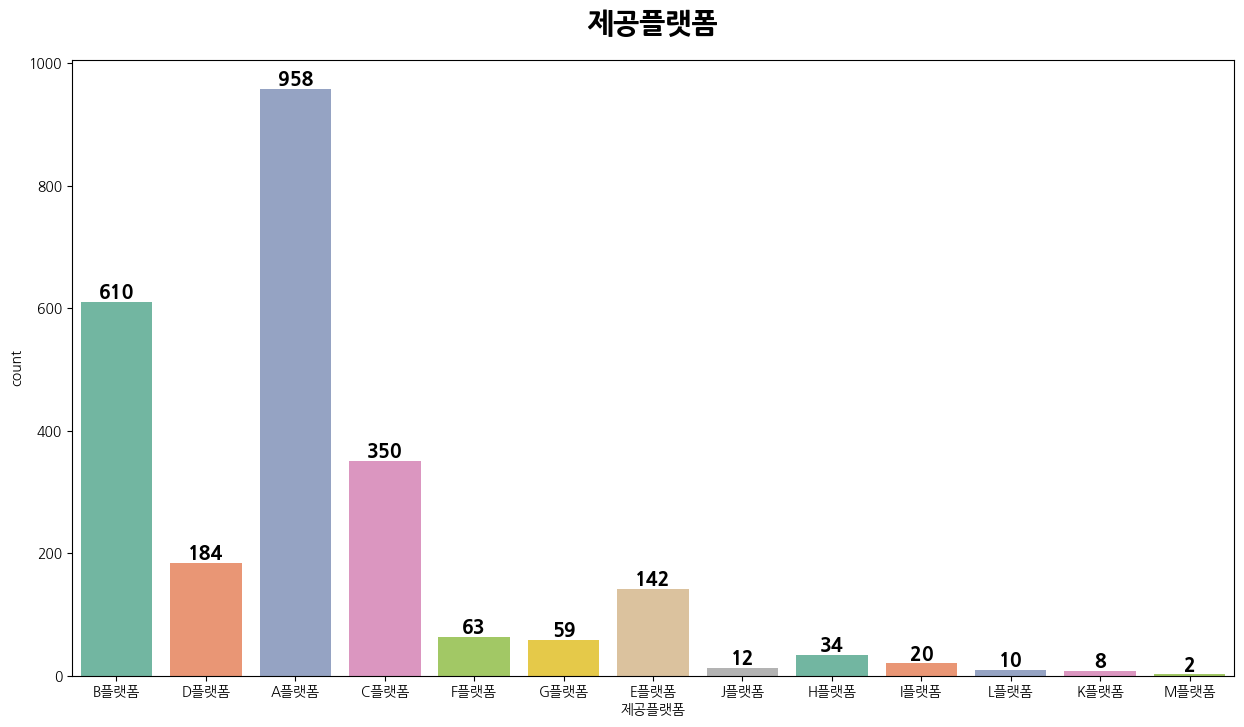

In [ ]:
plt.figure(figsize = (15, 8))

ax = sns.countplot(data = train, x = 'Ï†úÍ≥µÌîåÎû´Ìèº', palette = 'Set2')
for i in ax.containers:
    ax.bar_label(i, fontweight = 'black', size = 14)
plt.title("Ï†úÍ≥µÌîåÎû´Ìèº",fontweight="black",size=20,pad=20)

In [ ]:
plt.figure(figsize = (15, 8))
sns.histplot(data = train, x = 'Í≤åÏû¨Ïùº', kde = True)
plt.title('Í≤åÏû¨Ïùº Î∂ÑÌè¨', size = 18)
plt.show()

### 2. Feature Importance

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

target = 'ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä'


train_encoded = train.copy()

train_encoded['Í≤åÏû¨Ïùº'] = pd.to_datetime(train_encoded['Í≤åÏû¨Ïùº'], errors='coerce')
train_encoded['Í≤åÏû¨_Ïó∞ÎèÑ'] = train_encoded['Í≤åÏû¨Ïùº'].dt.year
train_encoded['Í≤åÏû¨_Ïõî'] = train_encoded['Í≤åÏû¨Ïùº'].dt.month
train_encoded['Í≤åÏû¨_Ïùº'] = train_encoded['Í≤åÏû¨Ïùº'].dt.day
train_encoded['Í≤åÏû¨_ÏöîÏùº'] = train_encoded['Í≤åÏû¨Ïùº'].dt.weekday

train_encoded.drop(['ID', 'Í≤åÏû¨Ïùº'], axis=1, inplace=True)

categorical_features = ['Îß§Î¨ºÌôïÏù∏Î∞©Ïãù', 'Î∞©Ìñ•', 'Ï£ºÏ∞®Í∞ÄÎä•Ïó¨Î∂Ä', 'Ï§ëÍ∞úÏÇ¨Î¨¥ÏÜå', 'Ï†úÍ≥µÌîåÎû´Ìèº', 'Í≤åÏû¨_ÏöîÏùº']
for col in categorical_features:
    train_encoded[col] = LabelEncoder().fit_transform(train_encoded[col])

# üîπ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X = train_encoded.drop(columns=[target])
y = train_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üîπ ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌõàÎ†®
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# üîπ Feature Importance Ï∂îÏ∂ú
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# üîπ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="coolwarm")
plt.title("Feature Importance (ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏)")
plt.xlabel("Ï§ëÏöîÎèÑ")
plt.ylabel("ÌäπÏÑ±")
plt.show()


<ipython-input-18-31827a503017>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="coolwarm")


In [ ]:
import statsmodels.api as sm

X = train[['Î≥¥Ï¶ùÍ∏à', 'ÏõîÏÑ∏', 'Í¥ÄÎ¶¨ÎπÑ']]
y = train['ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.359973
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä   No. Observations:                 2452
Model:                          Logit   Df Residuals:                     2448
Method:                           MLE   Df Model:                            3
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                 0.02702
Time:                        07:37:56   Log-Likelihood:                -882.65
converged:                       True   LL-Null:                       -907.16
Covariance Type:            nonrobust   LLR p-value:                 1.290e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6856      0.177    -15.190      0.000      -3.032      -2.339
Î≥¥Ï¶ùÍ∏à        

### 3. ÏÉÅÍ¥ÄÍ≥ÑÏàò

In [ ]:
from scipy.stats import pearsonr

def corr_pval(df, col1, col2):
    corr, p_value = pearsonr(df[col1], df[col2])
    return f"{corr:.3f} (p={p_value:.5f})"

results = {
    ("Î≥¥Ï¶ùÍ∏à", "ÏõîÏÑ∏"): corr_pval(train, "Î≥¥Ï¶ùÍ∏à", "ÏõîÏÑ∏"),
    ("Î≥¥Ï¶ùÍ∏à", "Í¥ÄÎ¶¨ÎπÑ"): corr_pval(train, "Î≥¥Ï¶ùÍ∏à", "Í¥ÄÎ¶¨ÎπÑ"),
    ("ÏõîÏÑ∏", "Í¥ÄÎ¶¨ÎπÑ"): corr_pval(train, "ÏõîÏÑ∏", "Í¥ÄÎ¶¨ÎπÑ"),
}

for key, value in results.items():
    print(f"{key[0]} vs {key[1]}: {value}")


Î≥¥Ï¶ùÍ∏à vs ÏõîÏÑ∏: 0.009 (p=0.65586)
Î≥¥Ï¶ùÍ∏à vs Í¥ÄÎ¶¨ÎπÑ: 0.055 (p=0.00685)
ÏõîÏÑ∏ vs Í¥ÄÎ¶¨ÎπÑ: -0.074 (p=0.00023)


### 4. Feature Enginnering

In [ ]:
train['Î≥¥Ï¶ùÍ∏à_ÏõîÏÑ∏_ÎπÑÏú®'] = train['ÏõîÏÑ∏'] / train['Î≥¥Ï¶ùÍ∏à']
train['Î≥¥Ï¶ùÍ∏à_ÏõîÏÑ∏_ÎπÑÏú®'] = train['Î≥¥Ï¶ùÍ∏à_ÏõîÏÑ∏_ÎπÑÏú®'].replace([np.inf, -np.inf], 0)  # Î¨¥ÌïúÎåÄ Í∞í Î∞©ÏßÄ
train['Î≥¥Ï¶ùÍ∏à_ÏõîÏÑ∏_ÎπÑÏú®'] = train['Î≥¥Ï¶ùÍ∏à_ÏõîÏÑ∏_ÎπÑÏú®'].fillna(0)  # NaN Í∞í 0ÏúºÎ°ú ÎåÄÏ≤¥

train[['Î≥¥Ï¶ùÍ∏à', 'ÏõîÏÑ∏', 'Î≥¥Ï¶ùÍ∏à_ÏõîÏÑ∏_ÎπÑÏú®']].head()

Î≥¥Ï¶ùÍ∏à      ÏõîÏÑ∏  Î≥¥Ï¶ùÍ∏à_ÏõîÏÑ∏_ÎπÑÏú®
0  402500000.0  470000   0.001168
1  170500000.0  200000   0.001173
2  114000000.0  380000   0.003333
3  163500000.0   30000   0.000183
4  346000000.0  530000   0.001532

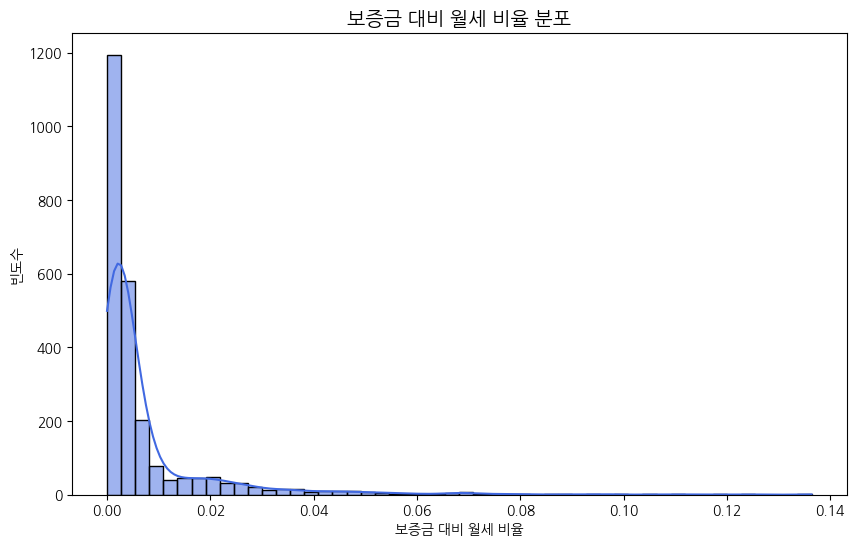

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Î≥¥Ï¶ùÍ∏à_ÏõîÏÑ∏_ÎπÑÏú®'], bins=50, kde=True, color="royalblue")
plt.title("Î≥¥Ï¶ùÍ∏à ÎåÄÎπÑ ÏõîÏÑ∏ ÎπÑÏú® Î∂ÑÌè¨", fontsize=14)
plt.xlabel("Î≥¥Ï¶ùÍ∏à ÎåÄÎπÑ ÏõîÏÑ∏ ÎπÑÏú®")
plt.ylabel("ÎπàÎèÑÏàò")
plt.show()

In [ ]:
from scipy.stats import pearsonr, spearmanr

corr_pearson, p_pearson = pearsonr(train['Î≥¥Ï¶ùÍ∏à_ÏõîÏÑ∏_ÎπÑÏú®'], train['ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä'])
corr_spearman, p_spearman = spearmanr(train['Î≥¥Ï¶ùÍ∏à_ÏõîÏÑ∏_ÎπÑÏú®'], train['ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä'])

print(f"ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr_pearson:.3f}, p-value: {p_pearson:.5f}")
print(f"Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr_spearman:.3f}, p-value: {p_spearman:.5f}")

# Ìï¥ÏÑù
if p_pearson < 0.05:
    print("ÌîºÏñ¥Ïä®: Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàòÏùº Í∞ÄÎä•ÏÑ± ÏûàÏùå!")
else:
    print("ÌîºÏñ¥Ïä®: ÌóàÏúÑÎß§Î¨ºÍ≥º Í¥ÄÍ≥Ñ ÏóÜÏùå.")

if p_spearman < 0.05:
    print("Ïä§ÌîºÏñ¥Îßå: Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàòÏùº Í∞ÄÎä•ÏÑ± ÏûàÏùå!")
else:
    print("Ïä§ÌîºÏñ¥Îßå: ÌóàÏúÑÎß§Î¨ºÍ≥º Í¥ÄÍ≥Ñ ÏóÜÏùå.")


ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.003, p-value: 0.87559
Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.009, p-value: 0.66482
ÌîºÏñ¥Ïä®: ÌóàÏúÑÎß§Î¨ºÍ≥º Í¥ÄÍ≥Ñ ÏóÜÏùå.
Ïä§ÌîºÏñ¥Îßå: ÌóàÏúÑÎß§Î¨ºÍ≥º Í¥ÄÍ≥Ñ ÏóÜÏùå.


In [ ]:
from scipy.stats import ttest_ind

real_estate = train[train['ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä'] == 0]['Î≥¥Ï¶ùÍ∏à_ÏõîÏÑ∏_ÎπÑÏú®']
fake_estate = train[train['ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä'] == 1]['Î≥¥Ï¶ùÍ∏à_ÏõîÏÑ∏_ÎπÑÏú®']

t_stat, p_value = ttest_ind(real_estate, fake_estate, equal_var=False)

print(f"t-Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ: {t_stat:.3f}, p-value: {p_value:.5f}")

if p_value < 0.05:
    print("Î≥¥Ï¶ùÍ∏à ÎåÄÎπÑ ÏõîÏÑ∏ ÎπÑÏú®Ïù¥ ÌóàÏúÑÎß§Î¨º Ïó¨Î∂ÄÏôÄ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏùå!")
else:
    print("Î≥¥Ï¶ùÍ∏à ÎåÄÎπÑ ÏõîÏÑ∏ ÎπÑÏú®Ïù¥ ÌóàÏúÑÎß§Î¨º Ïó¨Î∂ÄÏôÄ Ï∞®Ïù¥Í∞Ä ÏóÜÏùå.")


t-Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ: -0.155, p-value: 0.87725
Î≥¥Ï¶ùÍ∏à ÎåÄÎπÑ ÏõîÏÑ∏ ÎπÑÏú®Ïù¥ ÌóàÏúÑÎß§Î¨º Ïó¨Î∂ÄÏôÄ Ï∞®Ïù¥Í∞Ä ÏóÜÏùå.


In [ ]:
import statsmodels.api as sm

# ÎèÖÎ¶Ω Î≥ÄÏàò & Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
X = train[['Î≥¥Ï¶ùÍ∏à_ÏõîÏÑ∏_ÎπÑÏú®']]
y = train['ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä']

X = sm.add_constant(X)

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌõàÎ†®
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Í≤∞Í≥º ÌôïÏù∏
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.369964
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 ÌóàÏúÑÎß§Î¨ºÏó¨Î∂Ä   No. Observations:                 2452
Model:                          Logit   Df Residuals:                     2450
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:               1.339e-05
Time:                        07:35:48   Log-Likelihood:                -907.15
converged:                       True   LL-Null:                       -907.16
Covariance Type:            nonrobust   LLR p-value:                    0.8762
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9832      0.070    -28.216      0.000      -2.121      -1.845
Î≥¥Ï¶ùÍ∏à_ÏõîÏÑ∏_